Umme Rubaiyat Chowdhury
ID: 2021021
Section:A, batch: 6th

In [81]:
#importing libraries
import pandas as pd
import numpy as np
#Importing the requres ML Librarires
from sklearn.model_selection import train_test_split


In [82]:
#reading the dataset
data= pd.read_csv("admission.csv")

In [83]:
#converting data into DataFrame
df= pd.DataFrame(data)
df.head(3)

,sl,gmat,gpa,work experience,admitted,,.1,.2,.3,.4,.5
0,1,780,4.0,3,1,,NaN,NaN,NaN,NaN,NaN
1,2,750,3.9,4,1,,NaN,NaN,NaN,NaN,NaN
2,3,690,3.3,3,0,,NaN,NaN,NaN,NaN,NaN


In [84]:
#dropping unnecessary cloumns 
df.drop(df.iloc[:, 5:], inplace = True, axis = 1)
df.head(3)

,sl,gmat,gpa,work experience,admitted
0,1,780,4.0,3,1
1,2,750,3.9,4,1
2,3,690,3.3,3,0


In [85]:
#normalizing the data
normalized_df=(df-df.min())/(df.max()-df.min())

In [86]:
#Here, I used StandardScaler to remove the mean and scales each feature/variable to unit variance.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df),columns = df.columns)
scaled_df.head()

,sl,gmat,gpa,work experience,admitted
0,-1.689278,2.077331,1.452001,-0.247681,1.051315
1,-1.602648,1.582728,1.291559,0.335098,1.051315
2,-1.516018,0.593523,0.328906,-0.247681,-0.951190
3,-1.429389,0.923258,0.970675,0.917876,1.051315
4,-1.342759,0.428656,1.291559,0.335098,-0.951190


In [109]:
##Choossing the independent variable X and the dependent variable Y 
X= df.iloc[:,1:4]
X[0:5]

,gmat,gpa,work experience
0,780,4.0,3
1,750,3.9,4
2,690,3.3,3
3,710,3.7,5
4,680,3.9,4


In [110]:
y= df.iloc[:,4]
y[0:5]

0    1
1    1
2    0
3    1
4    0
Name: admitted, dtype: int64

Q1. Using last 4 digits of your JU ID/Roll number, select randomly 25% data for testing and 75% data for training 
for different classification models and consequent analysis. Print the FIRST 3 observations of training data data.

In [89]:
#train_test_split function used to split datas into train and test set
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=.25,random_state=6021)

In [90]:
#first 3 observations of training data
first_3=pd.concat([X_train.head(3),y_train.head(3)],axis=1)
print("First 3 observations from training data:\n ",first_3)

First 3 observations from training data:
      gmat  gpa  work experience  admitted
37   580  3.3                1         0
4    680  3.9                4         0
31   620  2.7                2         0


Q2. Consider the data set discussed in Q1. Develop classification model by logistic regression, Decision Tree,
Bagging, Ada Bost, and Random Forest using the training data set. Using the test data, determine model accuracies 
and comment on them.

In [91]:
from sklearn import metrics
import seaborn as sn

In [92]:
#Appling Logistic Regression model on the training set
from sklearn.linear_model import LogisticRegression
logisticReg= LogisticRegression()

In [93]:
logisticReg.fit(X_train,y_train)

LogisticRegression()

In [94]:
y_pred= logisticReg.predict(X_test)

In [95]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
 

Accuracy:  1.0


In [96]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

In [97]:
#Appling DecisionTreeClassifier model on the training set
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [98]:
#Appling Random Forest Regressor model on the training set
rf= RandomForestClassifier(n_estimators=100,max_features="auto",random_state=6021)
rf.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [99]:
#Appling AdaBoostClassifier model on the training set
ada= AdaBoostClassifier(n_estimators=100)
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [100]:
#Appling BaggingClassifier model on the training set
bg= BaggingClassifier(base_estimator= DecisionTreeClassifier(), n_estimators=100,random_state=6021)
bg.fit(X_train,y_train)
y_pred=bg.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [111]:
from sklearn.metrics import mean_squared_error, f1_score
def rmse_score(model, X_train, X_test, y_train, y_test):
    mse_train = mean_squared_error(y_true = y_train,
                                  y_pred = model.predict(X_train))
    mse_test = mean_squared_error(y_true = y_test,
                                  y_pred = model.predict(X_test))
    rmse_train = mse_train ** 0.5
    rmse_test = mse_test ** 0.5
    
    print("The training RMSE for " + str(model) + " is: " + str(rmse_train))
    print("The testing RMSE for " + str(model) + " is: " + str(rmse_test))
    return (rmse_train, rmse_test)

In [115]:
x1,y1 = rmse_score(logisticReg, X_train, X_test, y_train, y_test)

The training RMSE for LogisticRegression() is: 0.3651483716701107
The testing RMSE for LogisticRegression() is: 0.0


In [122]:
x2,y2 = rmse_score(dt, X_train, X_test, y_train, y_test)

The training RMSE for DecisionTreeClassifier() is: 0.0
The testing RMSE for DecisionTreeClassifier() is: 0.0


In [123]:
x3,y3 = rmse_score(rf, X_train, X_test, y_train, y_test)

The training RMSE for RandomForestClassifier(random_state=6021) is: 0.0
The testing RMSE for RandomForestClassifier(random_state=6021) is: 0.0


In [124]:
x4,y4 = rmse_score(ada, X_train, X_test, y_train, y_test)

The training RMSE for AdaBoostClassifier(n_estimators=100) is: 0.0
The testing RMSE for AdaBoostClassifier(n_estimators=100) is: 0.0


In [127]:
x5,y5 = rmse_score(bg, X_train, X_test, y_train, y_test)

The training RMSE for BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=6021) is: 0.0
The testing RMSE for BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=6021) is: 0.0


Using the best model, classify the following new observations to either Admitted or not admitted:

In [101]:
#new data
new_candidates = {'gmat': [730,690,720],
                  'gpa': [3.7,2.3,3.3],
                  'work_experience': [4,2,8]
                  }

In [129]:
#new data frame for the new data
df2 = pd.DataFrame(new_candidates,columns= ['gmat', 'gpa','work_experience'])
y_pred=dt.predict(df2)

print (df2)


   gmat  gpa  work_experience
0   730  3.7                4
1   690  2.3                2
2   720  3.3                8


In [130]:
print (y_pred)


[1 0 1]


Q3. Develop 3-Mean cluster model of the test data set for the 3 independent variables (gmat, gpa, and 
years of experience). Write down the three final center value print the clusters with centers.

In [104]:
#Import required module
from sklearn.cluster import KMeans
#Initialize the class object
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
#predict the labels of clusters.
label = kmeans.fit_predict(X)
print(label)


[1 1 0 1 0 1 0 1 1 0 2 0 1 0 1 2 2 0 2 2 2 2 2 2 2 0 0 2 0 0 0 2 0 0 0 0 0
 2 2 0]


In [105]:
 #three final center value
kmeans.cluster_centers_

array([[670.        ,   3.23333333,   3.83333333],
       [738.75      ,   3.6125    ,   4.5       ],
       [585.        ,   2.62142857,   2.28571429]])

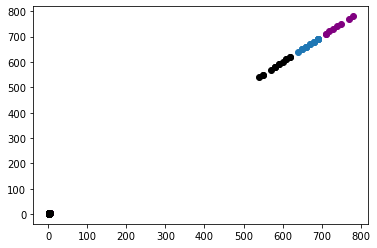

In [106]:
#printing the clusters with centers
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = X[label == 0]
filtered_label1 = X[label == 1]
filtered_label2 = X[label == 2]
 

#plotting the results
plt.scatter(filtered_label0, filtered_label0)
plt.scatter(filtered_label1, filtered_label1, color = 'purple')
plt.scatter(filtered_label2, filtered_label2, color = 'black')
plt.show()

Q4. Develop 3-nearest-neighbors cluster model of the test data set for the 3 independent variables
(gmat, gpa, and years of experience). Using the test data, construct confusion matrix and accuracy of the model.

In [107]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)  # number of neighbour group
classifier.fit(X_train, y_train)
y_pred=ada.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

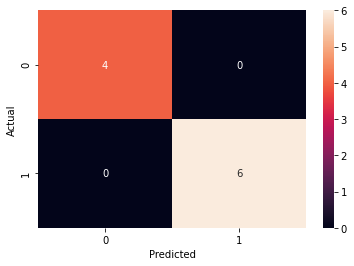

In [108]:
confusion_matrix= pd.crosstab(y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)


Q5. Finally, write a report based on the above results.

# Report

Here I have tried to determine whether candidates would get admitted to a prestigious university based on the three independent variables:

· GMAT score

· GPA

· Years of work experience

The dependent variable “admitted” represents whether a person gets admitted with two possible outcomes

· Admitted (coded as ‘1’)

and

· Rejected (coded as ‘0’).

Data Preprocessing

After importing the required data processing libraries, I have dropped the unnecessary columns.

Data Scaling

Then I used the StandardScaler function to remove the mean and scale each feature/variable to unit variance.

Data Splitting

Then, according to the assignment guideline, I have split the dataset to Test and Train with a 25:75 ratio.

After that, I Printed the first three observations of training data.

Model Generation

Next to the assignment guideline, I developed classification models by Logistic Regression, Decision Tree, Bagging, Ada Bost, and Random Forest using the training data set.

Model Accuracy

I found out the Accuracy of prediction from the experiment using my developed models. All my models have 100% accurate predictions for the dependent variable “admitted.” 

I also evaluate all the model by checking their RMSE error. Except Logistic Regression model rest of the models showes 0 RMSE score for both traing and testing set.

So, based on the data, except Logistic Regression all of the four models developed using Decision Tree, Bagging, Ada Bost, and Random Forest are best for this problem.

For this reason, I have used Logistic Regression and classified the following observations to either be “admitted” or “not_admitted.”

| gmat | gpa | Years of experience | admitted |

| 730 | 3.7 | 4 | 1 |

| 690 | 2.3 | 2 | 0 |

| 720 | 3.3 | 8 | 1 |

K-Means apply (K=3)

Then I developed 3-Mean cluster model of the test data set for the 3 independent variables (gmat, gpa, and years of experience). After I wrote down the three final center value.

3 Nearest Neighbour Apply

Then I developed 3-Nearest Neighbour model of the test data set for the 3 independent variables (gmat, gpa, and years of experience)

Confusion Matrix

After that, I displayed the confusion matrix and Accuracy of the model.

Summary

From the above experiment, I found all the implemented model accuracy to be 1 (100% Accurate). The data quantity being low & using the random state with my ID gives this result. If I use a different Random State, the Accuracy of the model decreases in a little ratio (Negligible).